# Part I - Prosper Loan Data Exploration
## by Tobi Abiola Babatunde

## Table of Contents
- Introduction
- Preliminary Wrangling
- Data Cleaning
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration
- Explanatory Analysis

## Introduction
- In this investigation, I wanted to investigate a loan data collected from customers. My focus is determine what affects borrower’s APR or interest rate, and if there was any difference between loans depending on how large the original loan amount was and other factor thatc could influence loan outcome.

- To aid these investigation, I will be using the Use the **Question-Visualization-Observationn** framework technique. I will do this by asking a question from the data, creating a visualization to find answers to the posed question, and then recording observations. A summary explanation will also be provided at the end of each exploraty section.



## Preliminary Wrangling
- This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

###### Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# check the file shape
loan.shape

(113937, 81)

In [4]:
# drop rows unrequired for this investigation
loan.drop(['InvestmentFromFriendsAmount','PercentFunded','RevolvingCreditBalance','TotalInquiries','InvestmentFromFriendsCount','LP_NonPrincipalRecoverypayments','LP_NetPrincipalLoss','LP_GrossPrincipalLoss','LP_CollectionFees','LP_ServiceFees','LP_InterestandFees','LP_CustomerPrincipalPayments','LP_CustomerPayments','MemberKey','LoanOriginationQuarter','EstimatedEffectiveYield','LoanOriginationDate','LoanNumber','LoanMonthsSinceOrigination','LoanFirstDefaultedCycleNumber','LoanCurrentDaysDelinquent','ScorexChangeAtTimeOfListing','ProsperPrincipalOutstanding','ProsperPrincipalBorrowed','ProsperPaymentsOneMonthPlusLate','ProsperPaymentsLessThanOneMonthLate','OnTimeProsperPayments','TotalProsperPaymentsBilled','TotalProsperLoans','LoanKey','TradesOpenedLast6Months','Recommendations','TradesNeverDelinquent (percentage)','StatedMonthlyIncome','TotalTrades','AvailableBankcardCredit','BankcardUtilization','PublicRecordsLast12Months','PublicRecordsLast10Years','DelinquenciesLast7Years','AmountDelinquent','CurrentDelinquencies','InquiriesLast6Months','OpenRevolvingMonthlyPayment','OpenRevolvingAccounts','TotalCreditLinespast7years','OpenCreditLines','FirstRecordedCreditLine','DateCreditPulled','GroupKey','CurrentlyInGroup','CreditScoreRangeUpper','CreditGrade','ListingCreationDate','ClosedDate'],axis = 1, inplace = True)


In [5]:
loan.shape

(113937, 26)

In [6]:
# high-level overview of data composition
loan.head()

,ListingKey,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CurrentCreditLines,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,LoanOriginalAmount,MonthlyLoanPayment,Investors
0,1021339766868145413AB3B,193129,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,...,2.0,True,640.0,5.0,0.17,"$25,000-49,999",True,9425,330.43,258
1,10273602499503308B223C1,1209647,36,Current,0.12016,0.0920,0.0820,0.0249,0.05470,6.0,...,44.0,False,680.0,14.0,0.18,"$50,000-74,999",True,10000,318.93,1
2,0EE9337825851032864889A,81716,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,...,NaN,False,480.0,NaN,0.06,Not displayed,True,3001,123.32,41
3,0EF5356002482715299901A,658116,36,Current,0.12528,0.0974,0.0874,0.0249,0.06000,6.0,...,113.0,True,800.0,5.0,0.15,"$25,000-49,999",True,10000,321.45,158
4,0F023589499656230C5E3E2,909464,36,Current,0.24614,0.2085,0.1985,0.0925,0.09066,3.0,...,44.0,True,680.0,19.0,0.26,"$100,000+",True,15000,563.97,20


In [7]:
loan.isnull().sum()

ListingKey                       0
ListingNumber                    0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
EstimatedLoss                29084
EstimatedReturn              29084
ProsperRating (numeric)      29084
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
EmploymentStatusDuration      7625
IsBorrowerHomeowner              0
CreditScoreRangeLower          591
CurrentCreditLines            7604
DebtToIncomeRatio             8554
IncomeRange                      0
IncomeVerifiable                 0
LoanOriginalAmount               0
MonthlyLoanPayment               0
Investors                        0
dtype: int64

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   ListingNumber              113937 non-null  int64  
 2   Term                       113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   LenderYield                113937 non-null  float64
 7   EstimatedLoss              84853 non-null   float64
 8   EstimatedReturn            84853 non-null   float64
 9   ProsperRating (numeric)    84853 non-null   float64
 10  ProsperRating (Alpha)      84853 non-null   object 
 11  ProsperScore               84853 non-null   float64
 12  ListingCategory (numeric)  113937 non-null  int64  
 13  BorrowerState              10

In [9]:
# descriptive statistics for numeric variables
print(loan.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
count  113937.000000   84853.000000     84853.000000             84853.000000   
mean        0.182701       0.080306         0.096068                 4.072243   
std         0.074516       0.046764         0.030403                 1.673227   
min        -0.010000       0.004900        -0.182700  

### Dataset Structure

- There are 113937 loans and 81 attributes for each loan. Most of the variablea re numeric in nature and while most of them might be a useful features of each loan, it is impractical to use all of them for this investigation due to time constrain and as a result some of the fetures has been dopped.

- The features left includes;
- **ListingKey**: Unique key for each listing, same value as the 'key' used in the listing object in the API.
- **ListingNumber**: The number that uniquely identifies the listing to the public as displayed on the website.
- **Term**: The length of the loan expressed in months.
- **LoanStatus**: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- **BorrowerAPR**: The Borrower's Annual Percentage Rate (APR) for the loan.
- **BorrowerRate**: The Borrower's interest rate for this loan. 
- **EmploymentStatus**: The employment status of the borrower at the time they posted the listing.
- **ProsperRating (numeric)**: The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
- **ProsperRating (Alpha)**: The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
- **ProsperScore**: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
- **ListingCategory**: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
- **EmploymentStatusDuration**: The length in months of the employment status at the time the listing was created.
- **IsBorrowerHomeowner**: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- **CreditScoreRangeLower**: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
- **Occupation**: occupation of borrower
- **DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
- **Income Range**: The income range of the borrower at the time the listing was created.
- **LoanOriginalAmount**: original amount of the loan requested
- **MonthlyLoanPayment**: amount of loan repayment to be made monthly
- **Investors**: The number of investors that funded the loan.

### Main feature(s) of interest in the dataset

- In this investigation, I am mostly interested in the factors that determines loan outcome status the major determinant of a loan Annual Percentage Rate (APR).

### Features in the dataset that could help support investigation into my main feature(s) of interest

- I expect features such as employment status, recommendations, monthly income and employment duration to determine loan outcome status, I also expect some of the features to affect features such as original loan amount, credit score, prosper score, and prosper rating to be a major determiant of borrower APR.

## Data Cleaning

- During prelimary dataset examination, I observed that the column showing customer reasons for loan request ( To examine the borrowers reason **ListingCategory (numeric)** was coded in numeric value, in order to aid data assessmenet and analysis, I will interprete and replace the dataset in this column using data dictionary, the resulting data will be converted to an ordered category afterwards.

- **ProsperRating (Alpha)** and **Income range** column also needs to be converted to ordered categorical data as well using the functions below.

- Occupation, Borrower State, Employment Status and loan status will be changed to categorical data by applying astype method.

In [10]:
# Convert listing category from numeric coding to string coding using the dataset dictionary

loan['ListingCategory (numeric)'] = loan['ListingCategory (numeric)'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation','Wedding Loans'])
loan['ListingCategory (numeric)'].value_counts()


Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory (numeric), dtype: int64

In [11]:
#convert the numeric listing category into ordered categorical types
ordinal_var_dict = {'ListingCategory (numeric)': ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans'
], 
                    'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)
    

In [12]:
#Convert the other columns to categorical data by applying astype method.
loan.LoanStatus = loan.LoanStatus.astype('category')
loan.Occupation = loan.Occupation.astype('category')
loan.BorrowerState = loan.BorrowerState.astype('category')
loan.EmploymentStatus = loan.EmploymentStatus.astype('category')

## Univariate Exploration

#### 1. What are the major motivation or reasons for borrowers loan request?

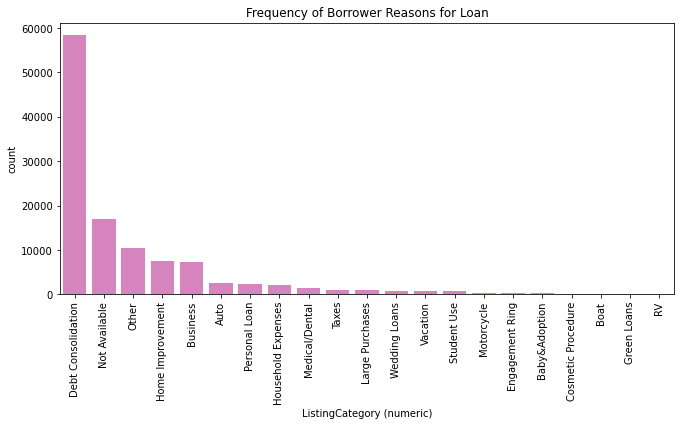

In [13]:
#Examine the borrower reasons/motivation for loan request

# Choose the tuple for RGB colors
base_color = sb.color_palette()[6]
type_order = loan['ListingCategory (numeric)'].value_counts().index
plt.figure(figsize = [11, 5]) 

# Use the color argument
sb.countplot(data = loan, x = 'ListingCategory (numeric)', color = base_color,order = type_order)
plt.title('Frequency of Borrower Reasons for Loan')
plt.xticks(rotation=90);


- Based on the graph above, it appears that the major reason for loan is debt consolidation, this implies that most of the loans are as a result of borrowers card bills or loan payments,etc being rolled into one monthly payment. Home improvement and Business were also a major morivation behind some of the loan requests.
- It is worth noting that close to 20,000 of the dataset for this loans request did not have reasons for loan documented and as such recorded as **Not Available**.

#### 2. What is the loan status distribution as at the time this dataset was captured?

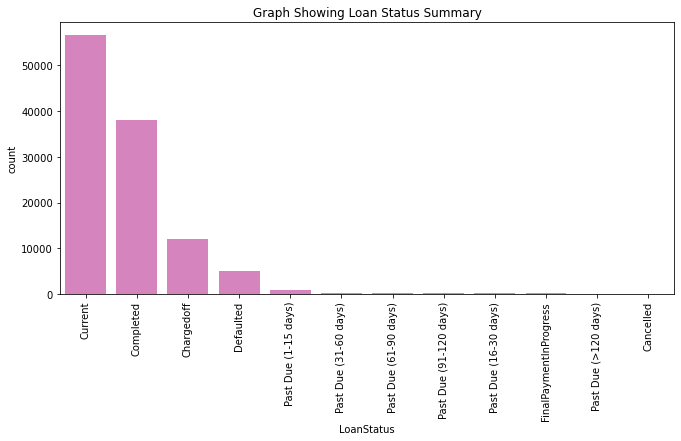

In [14]:
# Examine the summary of loan status

# Choose the tuple for RGB colors
base_color = sb.color_palette()[6]
type_order = loan.LoanStatus.value_counts().index
plt.figure(figsize = [11, 5]) 

# Use the `color` argument
sb.countplot(data=loan, x='LoanStatus', color=base_color,order=type_order)
plt.title('Graph Showing Loan Status Summary')
plt.xticks(rotation=90);

- Most of the loans as at the time the dataset was captured were still current with over 55,000 of the requests in this status.
- A significant amount of the loans has also been completed as the time of the dataset capture.
- Interestingly, around 5,000 of the loans were defaulted while more than 10, 000 has been charged off.

#### 3. What is Prosper risk assessment score for this Borrowers?

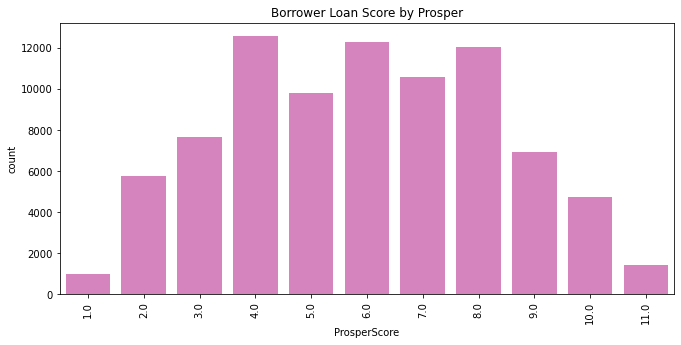

In [15]:
# Examine the summary of Loan Score by Prosper
#The score ranges from 1-10, with 10 being the best, or lowest risk score.

# Choose the tuple for RGB colors
base_color = sb.color_palette()[6]
plt.figure(figsize = [11, 5])

# Use the `color` argument
sb.countplot(data=loan, x='ProsperScore', color=base_color)
plt.title('Borrower Loan Score by Prosper')
plt.xticks(rotation=90);

- From the graph above, most of this borrowers fall within the 2.0 - 10.0 risk score bracket, with a little proportion of borrowers at either extreme ends of the ratings.
- Score ratings 4.0, 6.0 and 8.0 has most borrowers, this suggests that most customers fall within average risk ratings based on the risk assessment conducted by Prosper.

#### 4. Aside Borrowers Risk Assessment , did Prosper conducted any other form of due deligence to ensure Borrowers do not default on loan?

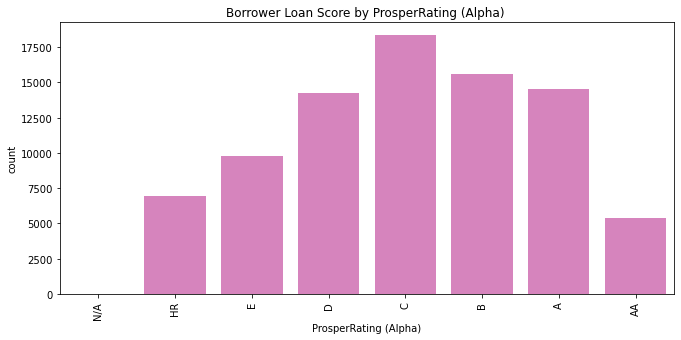

In [16]:
# Examine the summary of Prosper Loan Score by Numeric Rating

# Choose the tuple for RGB colors
base_color = sb.color_palette()[6]
plt.figure(figsize = [11, 5])

# Use the `color` argument
sb.countplot(data=loan, x= 'ProsperRating (Alpha)', color=base_color)
plt.title('Borrower Loan Score by ProsperRating (Alpha) ')
plt.xticks(rotation=90);

- Prosper also conducted an Alpha rating on borrowers aside the risk assessment.
- This alpha rating was conducted on every borrower and most borrowers fall within **C** rating.

#### 5.  What is Borrowers Income Range distribution? Perhaps this could be related to the customers motivation for loan request.

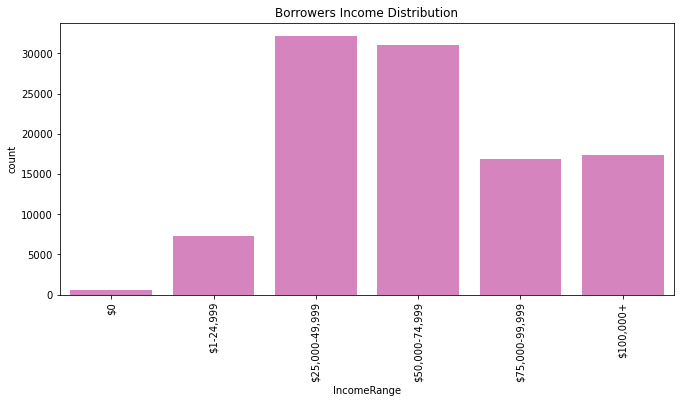

In [17]:
# Examine the summary of Borrowers Income Range Distribution
#The score ranges from 1-10, with 10 being the best, or lowest risk score.

# Choose the tuple for RGB colors
base_color = sb.color_palette()[6]
plt.figure(figsize = [11, 5])

# Use the `color` argument
sb.countplot(data=loan, x= 'IncomeRange', color=base_color)
plt.title('Borrowers Income Distribution')
plt.xticks(rotation=90);

- Borrowers fell within the 25,000 to 49,999 dollars and 50,000 to 74,999 dollars income range bracket while a significant amount of borrowers earn above 75,000 dollars.

#### 6. What State are most of the borrowers from?

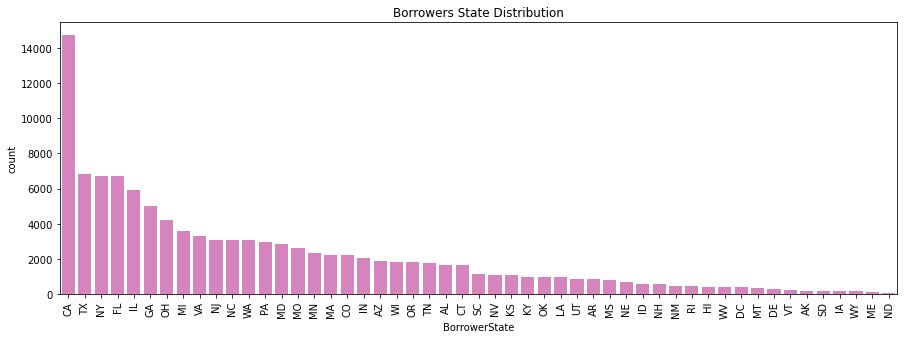

In [18]:
# Examine the Distribution of Borrowers State

# Choose the tuple for RGB colors
base_color = sb.color_palette()[6]
plt.figure(figsize = [15, 5])
bstate_order = loan['BorrowerState'].value_counts().index

# Use the `color` argument
sb.countplot(data=loan, x= 'BorrowerState', color=base_color, order = bstate_order)
plt.title('Borrowers State Distribution')
plt.xticks(rotation=90);

- The plot above suggest that top 5 states with borrowers are California (CA), Texas (TX), New York (NY), Florida (FL) AND Illinois (IL), however it might be difficult to make deduction from this data alone as the distribution might be a mere reflection of the population of this states or for other reasons.

#### 7. What is the distributoion of the Borrowers Annual Percentage Rate (APR) for the loan?

In [109]:
# check APR statistics to determine the bin range
loan.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

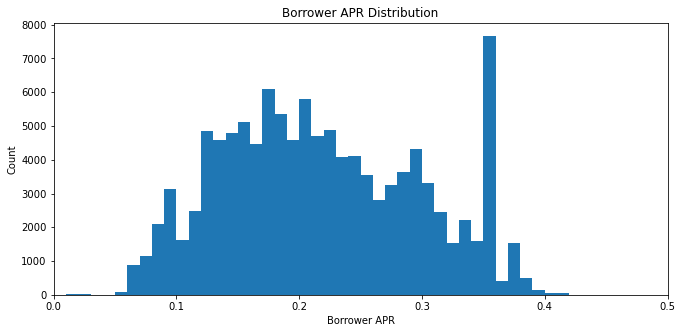

In [110]:
# investigating borrower apr
binsize = 0.01
bins = np.arange(0, 0.52, 0.01)

plt.figure(figsize=[11, 5])
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins)
plt.xlim([0,0.5])
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Borrower APR Distribution')
plt.show()

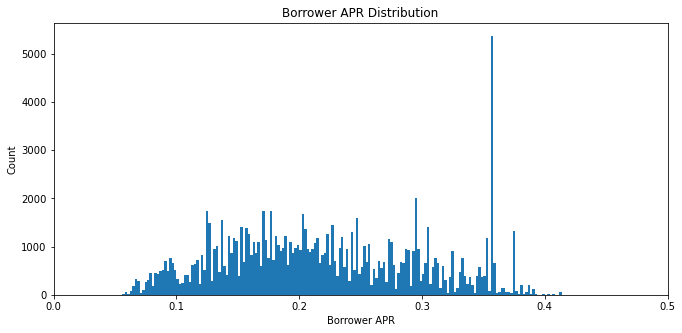

In [111]:
# investigating borrower APR using a smaller bin size
binsize = 0.002
bins = np.arange(0, 0.52, 0.002)

plt.figure(figsize=[11, 5])
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins)
plt.xlim([0,0.5])
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Borrower APR Distribution')
plt.show()

- Borrowers APR distribution appears normal with a sharp spike around 0.35. There seems to a clearer trend when a smaller bin size which shows presence of flunctuations in the distribution.

#### 8.  What is the distribution of monthly loan repayment by borrowers?

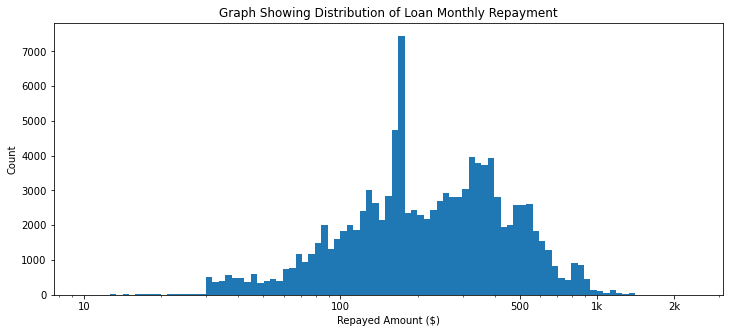

In [112]:
# examine the monthly loan repayment distribution
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(loan['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = loan, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10,100, 500, 1e3, 2e3], ['10', '100', '500', '1k', '2k'])
plt.xlabel('Repayed Amount ($)')
plt.ylabel('Count')
plt.title('Graph Showing Distribution of Loan Monthly Repayment')
plt.show()

- The graph above suggests that most monthly repayment fall between 100 and 1000 dollars with peak repayment around 200 dollars per month.

#### 9. What is the investor distribution?

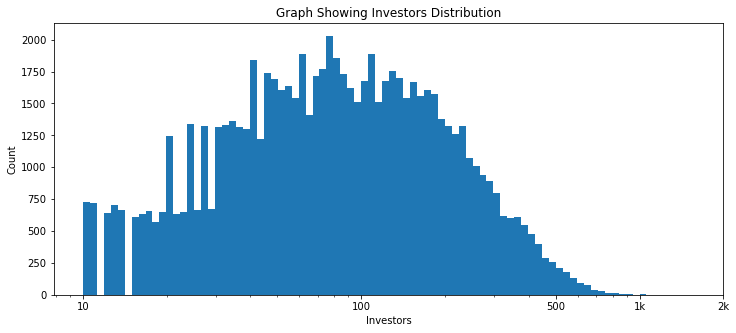

In [113]:
# examine the Investor distribution
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(loan['Investors'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = loan, x = 'Investors', bins = bins)
plt.xscale('log')
plt.xticks([10,100, 500, 1e3, 2e3], ['10', '100', '500', '1k', '2k'])
plt.xlabel('Investors')
plt.ylabel('Count')
plt.title('Graph Showing Investors Distribution')
plt.show()

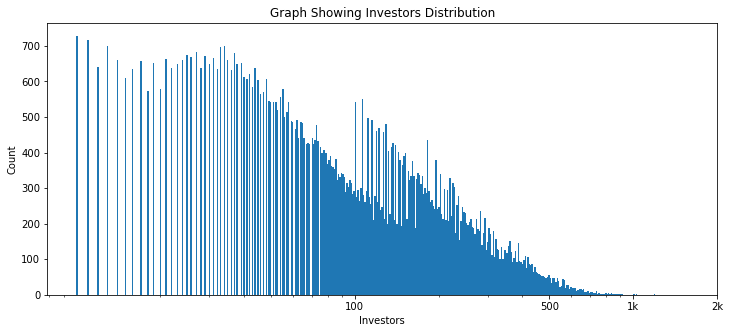

In [114]:
# examine the Investor distribution using a smaller bin size
log_binsize = 0.005
bins = 10 ** np.arange(1, np.log10(loan['Investors'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = loan, x = 'Investors', bins = bins)
plt.xscale('log')
plt.xticks([100, 500, 1e3, 2e3], ['100', '500', '1k', '2k'])
plt.xlabel('Investors')
plt.ylabel('Count')
plt.title('Graph Showing Investors Distribution')
plt.show()

- The investors distribution using a smallers bin is a very interesting one as there appears to be a sort of repeated decline over the trends.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- I examined the distribution of the loan status outcome, borrowers reason for loan request, borrower loan score, borrower APR and 3 other features of the dataset. 

- The distribution of the borrower APR appears was quite interesting. It seems normal when using a large bin size, however a closer look using a very small bin size suggests that the borrower APR distribution somewhat fluntuates, most distribution falls between 0.1 and 0.4. There was also a very sharp spike in the distribution at the tail end of 0.35 suggesting that this is the climax of APR distribution.

- Debt consolidation appears to be the major reason for loan request, this implies that most of the loans are as a result of borrowers card bills or loan payments,etc being rolled into one monthly payment. Interestingly, around 5,000 of the loans were defaulted while more than 10, 000 has been charged off.

- Majority of borrowers are from California (CA), Texas (TX), New York (NY), Florida (FL) AND Illinois (IL), but aas earlier stated it might be difficult to make deduction from this data alone as the distribution might be a mere reflection of the population of this states or for other reasons.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- To conduct investigation, I had to do some data cleaning to convert some of the variables to an ordered categorical data and in categorical data in some cases. This is to aid data visualization


## Bivariate Exploration

- In this section, I will investigate relationships between pairs of variables in the dataset.

#### 10. What is the correlation among the numerical variables and how strong or weak is the correlation?

In [21]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedLoss', 'EstimatedReturn', 'EmploymentStatusDuration','CreditScoreRangeLower','DebtToIncomeRatio','CurrentCreditLines','LoanOriginalAmount','Investors']
categoric_vars = ['ListingCategory (numeric)','ProsperRating (Alpha)','IncomeRange','LoanStatus','Occupation','BorrowerState','EmploymentStatus','IncomeRange']


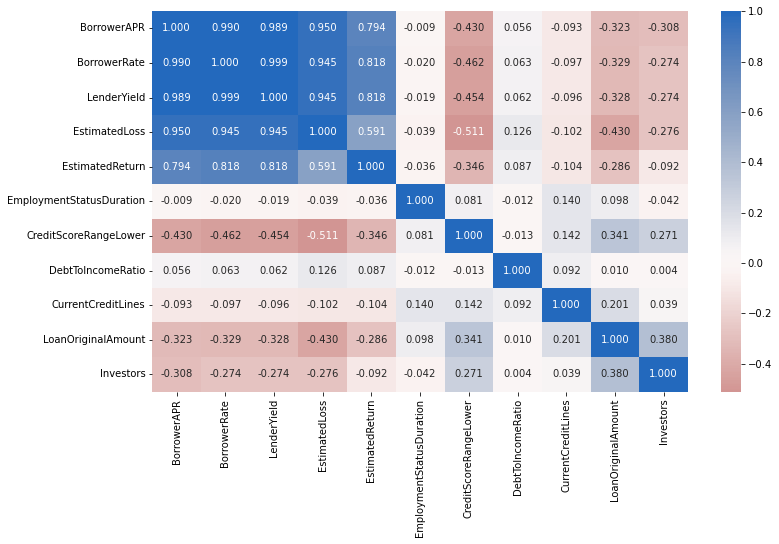

In [22]:
# correlation plot
plt.figure(figsize = [12, 7])
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### 11. Can we examine the correlation further using scatterplot?

loan.shape= (113937, 26)
loan_samp.shape= (500, 26)


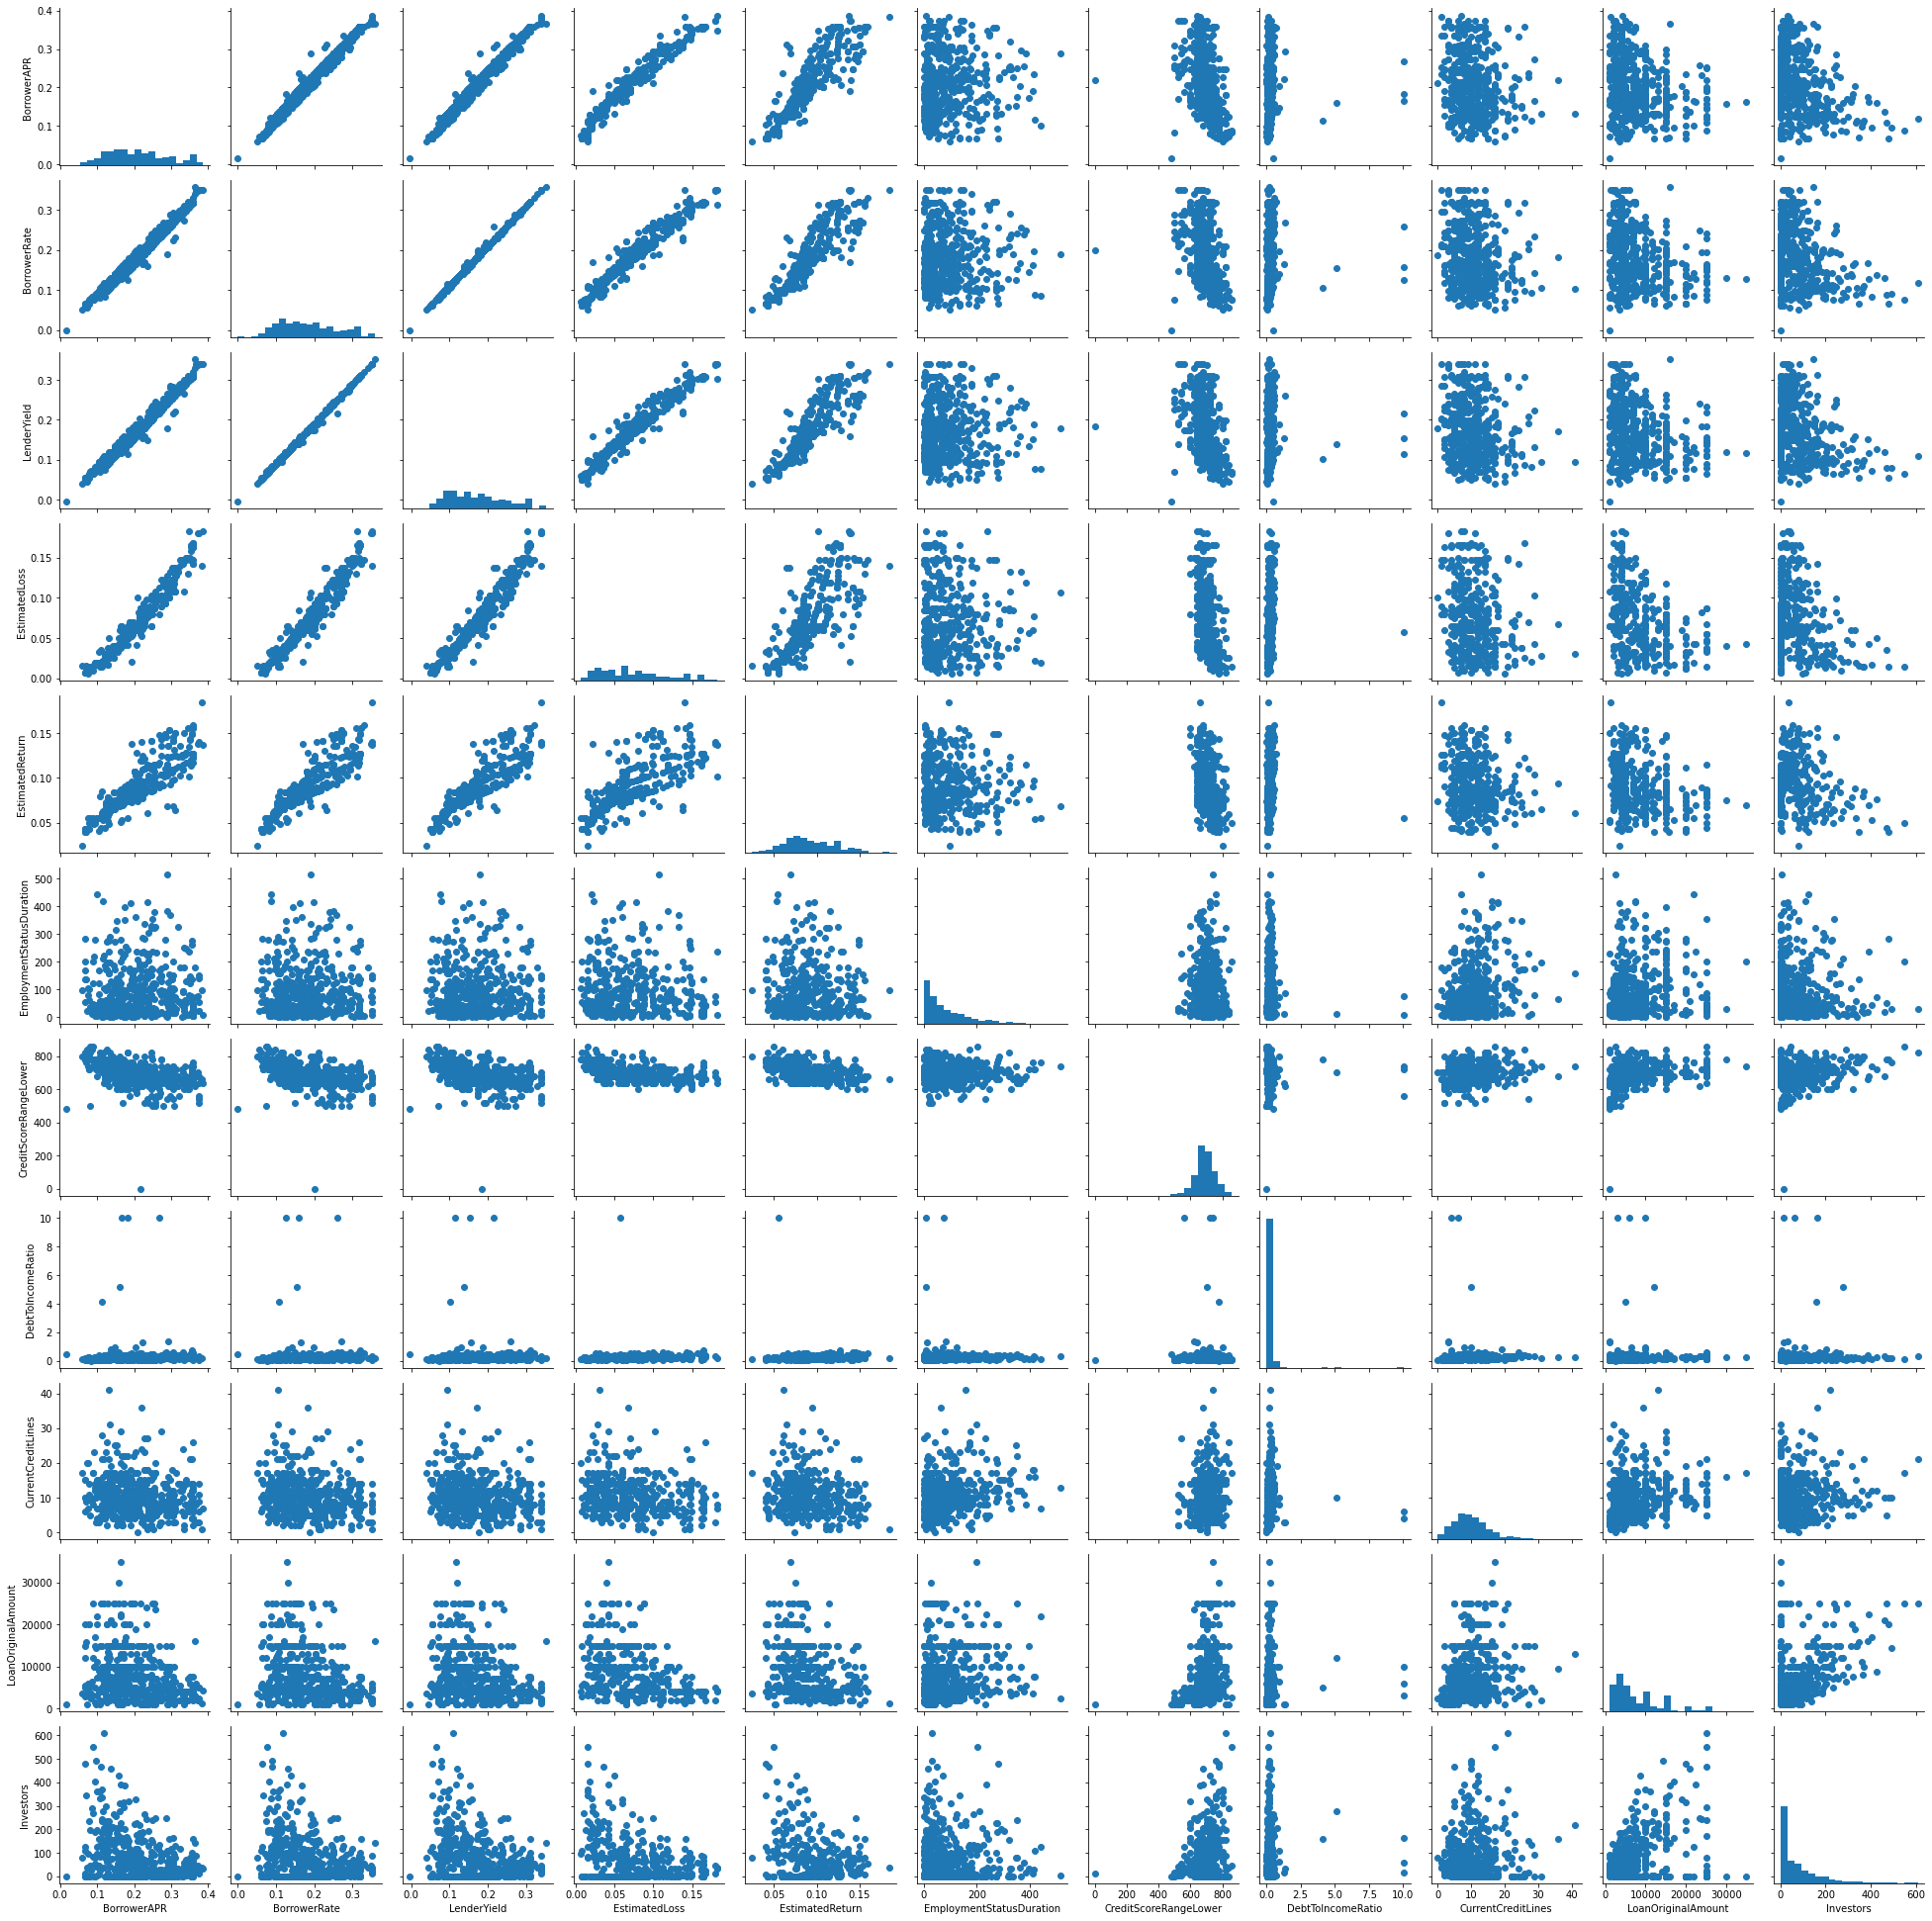

In [23]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("loan.shape=",loan.shape)
loan_samp = loan.sample(n=500, replace = False)
print("loan_samp.shape=", loan_samp.shape)

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- There seems to be a very strong positive correlation between the following features;
    - Borrower APR and Borrower Rate, Lender Yield, Estimated Loss and Estimated Return
    - Borrower Rate and Lender Yield, Estimated Loss and Estimated Return

- There is a negative correlation between the following features;
    - Borrower APR and Investors
    - Estimated Loss and Loan Original Amount

#### 12.  Which of the features mostly determines Borrowers APR?

<Figure size 720x720 with 0 Axes>

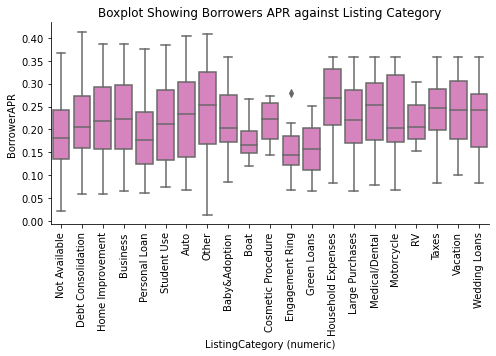

In [31]:
# Plot Borrowers APR against Listing Category
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[6]
    sb.boxplot(x=x, y=y, color=default_color)

loan_samp = loan.sample(n=7000, replace = False)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_samp, y_vars = ['BorrowerAPR'], x_vars = 'ListingCategory (numeric)',
                height = 3.5, aspect = 2.0)
g.map(boxgrid)
plt.xticks(rotation=90)
plt.title('Boxplot Showing Borrowers APR against Listing Category')
plt.show();



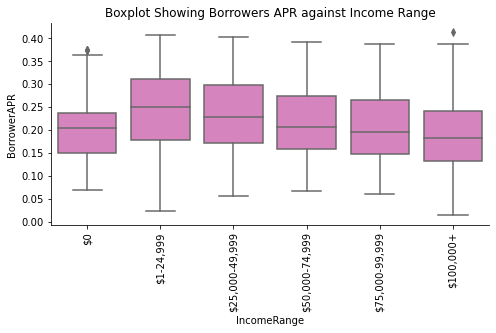

In [32]:
# Plot Borrowers APR against Income Range
g = sb.PairGrid(data = loan_samp, y_vars = ['BorrowerAPR'], x_vars = 'IncomeRange', height = 3.5, aspect = 2.0)
g.map(boxgrid)
plt.xticks(rotation=90)
plt.title('Boxplot Showing Borrowers APR against Income Range')
plt.show();


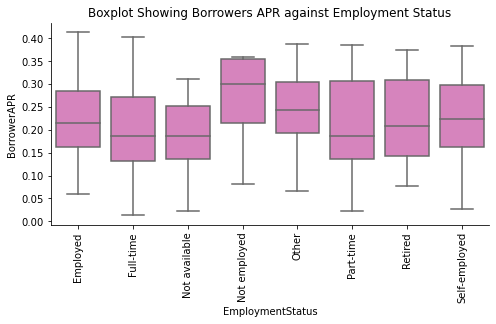

In [33]:
# Plot Borrowers APR against Employment Status

g = sb.PairGrid(data = loan_samp, y_vars = ['BorrowerAPR'], x_vars = 'EmploymentStatus', height = 3.5, aspect = 2.0)
g.map(boxgrid)
plt.xticks(rotation=90)
plt.title('Boxplot Showing Borrowers APR against Employment Status')
plt.show();


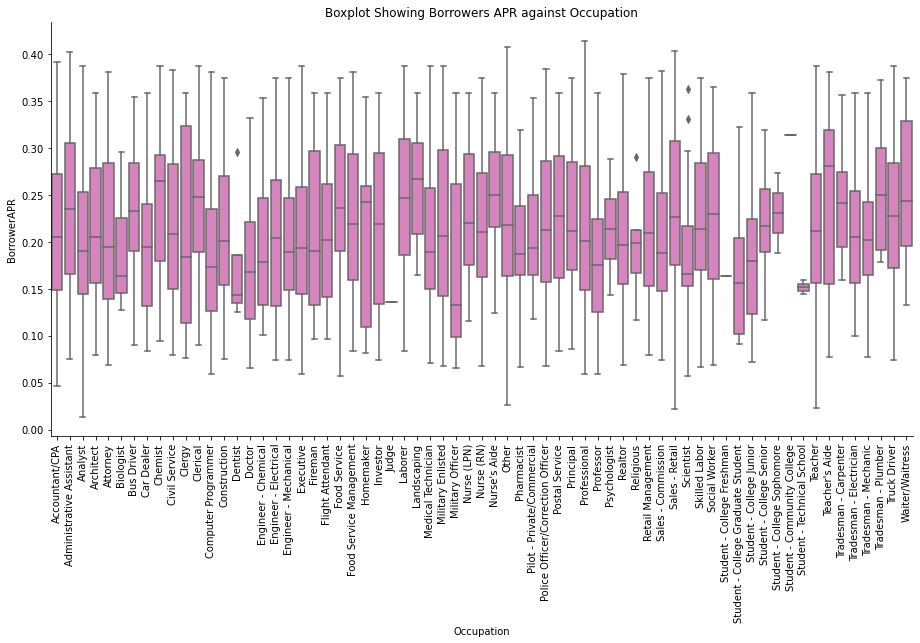

In [34]:
# Plot Borrowers APR against Occupation

g = sb.PairGrid(data = loan_samp, y_vars = ['BorrowerAPR'], x_vars = 'Occupation', height = 6.5, aspect = 2.0)
g.map(boxgrid)
plt.xticks(rotation=90)
plt.title('Boxplot Showing Borrowers APR against Occupation')
plt.show();


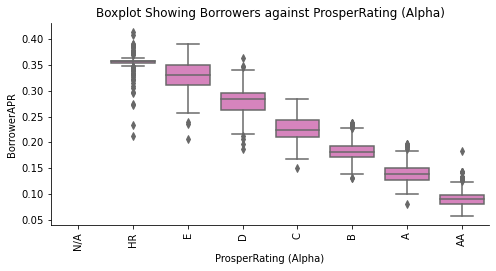

In [35]:
# Plot Borrowers APR against ProsperRating (Alpha)

g = sb.PairGrid(data = loan_samp, y_vars = ['BorrowerAPR'], x_vars = 'ProsperRating (Alpha)', height = 3.5, aspect = 2.0)
g.map(boxgrid)
plt.xticks(rotation=90)
plt.title('Boxplot Showing Borrowers against ProsperRating (Alpha)')
plt.show();


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Most of the boxplot shows a somewhat similar relationship between the variables and borrowers APR. However, the box plot between borrower APR and Prosper Rating Alpha shows the existence of a very strong relationship that exist between the two features. I observed from the plot that borrower APR was at the highest when the borrowers alpha rating was **HR**, the difference in the APR is significantly different for each of the ratings and this strongly suggests that the ProperRating(Alpha) is a major determinant of Borrowers APR.

- Borrowers APR also appears significantly higher for unemployed borrowers that others with median APR around 0.24.
- Also, students in Technical school seems to have a very small APR which suggests that the loans might have been backed or subsidized by governmemnt or other agencies.

## Multivariate Exploration

- The main thing I want to explore in this part of the analysis is how some of the categorical features play into the relationship between the numerical deatures

#### 13. Is there a relationship between Borrowers APR, Lender Yield, and Prosper Rating

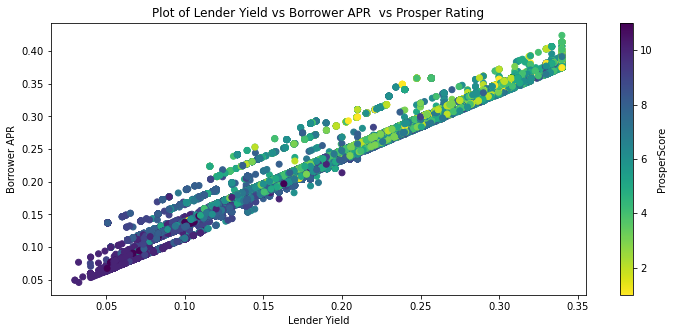

In [36]:
# Scatter plot of Lender Yield vs Borrower APR  vs ProsperRating (Alpha)
plt.figure(figsize = [12, 5])
plt.scatter(data = loan, x = 'LenderYield', y = 'BorrowerAPR', c = 'ProsperScore', cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.title('Plot of Lender Yield vs Borrower APR  vs Prosper Rating');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

- There is a very strong positive correlation between Borrowes APR, Lender Yield, and Prosper Rating.
- Correlation is at the highest when Borrowers APR and Lender Yield is less than 0.15

#### 13. Is their a relationship between Borrower APR, Income Range, Employment Status and loan status outcome, does APR affect the loan outcome?

<Figure size 864x360 with 0 Axes>

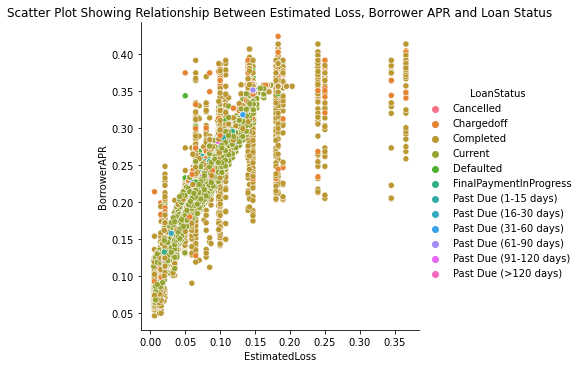

In [37]:
plt.figure(figsize = [12, 5])
sb.relplot(data = loan, x = 'EstimatedLoss', y = 'BorrowerAPR', hue = 'LoanStatus', kind = 'scatter')
plt.title('Scatter Plot Showing Relationship Between Estimated Loss, Borrower APR and Loan Status')
plt.show()

- There is not enough data in the graph above to clearly show if APR affects the loan status.

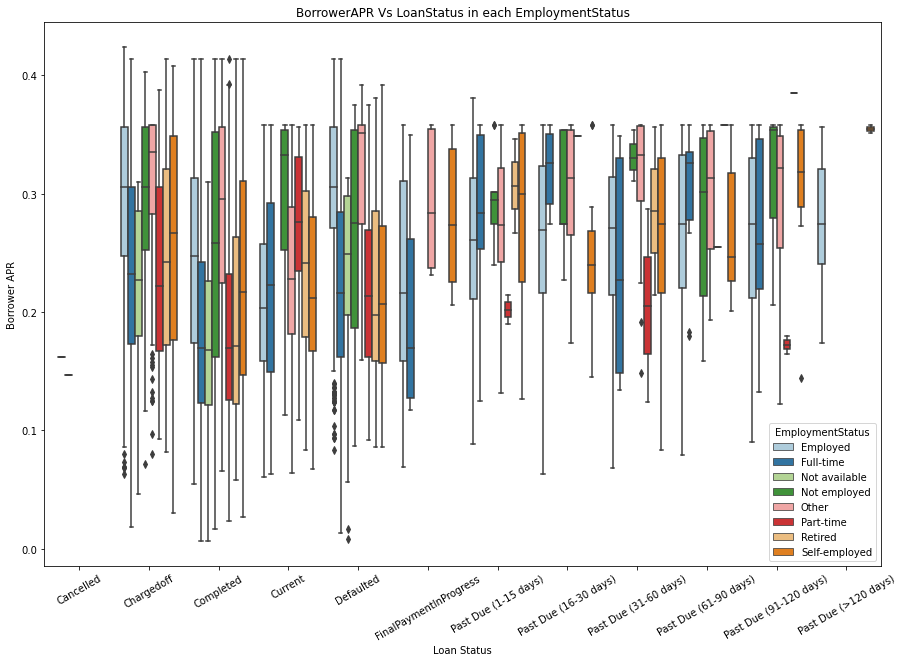

In [38]:
# Loan Status Vs Borrower APR in each Employment Status

plt.figure(figsize = [15, 10])

sb.boxplot(x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus', data = loan, palette = "Paired");
plt.title('BorrowerAPR Vs LoanStatus in each EmploymentStatus');
plt.xlabel('Loan Status');
plt.ylabel('Borrower APR');
plt.xticks(rotation = 30);

- There was limited available data for cancelled loan status.
- Borrowers who are Self-employed or Not-employed appears to have the widest APR range in most of the loan status categories. 
- Borrowers with part time employment status seems to have an interesting trend especially on Past Due (1-15 Days), Past Due (61-90 Days), and Past Dues (91-120 Days) have very small APR around and below 0.2

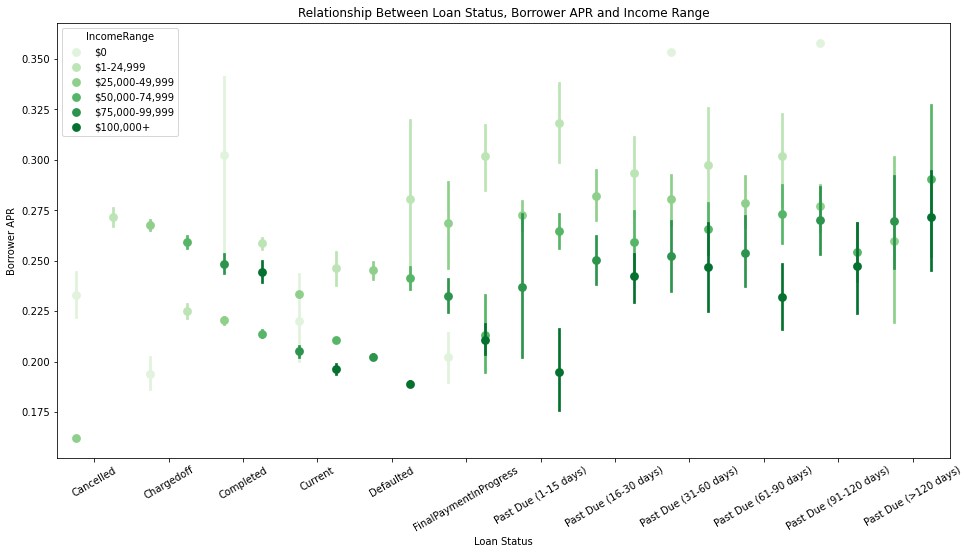

In [39]:
#Scatter plot of Loan Status vs Borrower APR vs Income Range

plt.figure(figsize = [16, 8])

sb.pointplot(data = loan, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'IncomeRange',
             palette = 'Greens', linestyles = '', dodge = 2.5)
plt.title('Relationship Between Loan Status, Borrower APR and Income Range')
plt.ylabel('Borrower APR');
plt.xlabel('Loan Status');
plt.xticks(rotation = 30);

- Majority of Past Due loansappear to be from borrowers earning above 50,000 dollars.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- There is a very strong positive correlation between Borrowes APR, Lender Yield, and Prosper Rating.
- Correlation is at the highest when Borrowers APR and Lender Yield is less than 0.15
- There was limited available data for cancelled loan status.
- Borrowers who are Self-employed or Not-employed appears to have the widest APR range in most of the loan status categories. 
- Borrowers with part time employment status seems to have an interesting trend especially on Past Due (1-15 Days), Past Due (61-90 Days), and Past Dues (91-120 Days) have very small APR around and below 0.2

### Were there any interesting or surprising interactions between features?
- Majority of Past Due loansappear to be from borrowers earning above 50,000 dollars. This is interesting because I was expecting past due loans to be more amongst borrowers earning lower.

## Conclusions
- For this investigations, I extracted 26 features from the 81 available features in the dataset to conduct this analysis. I converted some of the features to categorical data and ordered them to aid visualization.

- I obsereved a very strong positive correlation between Borrower APR and Borrower Rate, Lender Yield, Estimated Loss & Estimated Return, there was also strong positive relationship between Borrower Rate and Lender Yield, Estimated Loss & Estimated Return.

- There is a negative correlation between the Borrower APR and Investors, Estimated Loss and Loan Original Amount

- The investigation suggests that ProsperRating (Alpha) is a significant determinant of Borrowers APR, with APR being highest for customer in HR rating category and lowest in AA rating category. There is a very strong positive correlation between Borrowes APR, Lender Yield, and Prosper Rating.
- It is also worth noting that alot of the borrowers were from California, and APR rate for loans received by Students in Technical school was very low suggesting the loan might have been backed by the government.Debt consolidation was rated as the highest reason for borrowing.

### Limitations
- There were too many unmrequired features in the dataset.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

